# How to upload the sorted images to Tumblr

In [1]:
import pytumblr

Important: save the authentication keys in another file

In [2]:
keys_file = open("tumblr_key.txt")
lines = keys_file.readlines()
consumer_key = lines[0].rstrip()
consumer_secret = lines[1].rstrip()
oauth_token = lines[2].rstrip()
oauth_secret = lines[3].rstrip()

In [3]:
# Authenticate via OAuth
client = pytumblr.TumblrRestClient(
  consumer_key,
  consumer_secret,
  oauth_token,
  oauth_secret
)

#client.info()

## Load the data

In [4]:
#import pandas as pd
#from PIL import Image

In [5]:
df = pd.read_csv("collage/WithKnee.csv")
df.head()

,sorted_names,sorted_RGBcolors
0,edc9df272ba8f3408a6e0b8adca77aab,"(2, 2, 2)"
1,8bffe092134cac84ac5affab4fb9b738,"(8, 5, 4)"
2,2c27fde2ab88cfa75ff0ec8af468c03a,"(12, 4, 4)"
3,d737259b476c60f33b9c0a6e36b962de,"(20, 5, 4)"
4,eb3793fe21d9ea837eb5e1f619bda67b,"(21, 10, 7)"


In [6]:
df.shape

(164, 2)

## Upload the images for the first time

### First, generate the dates for each publication

In [7]:
from datetime import date, timedelta, datetime

today = date.today()
delta = timedelta(days = len(df['sorted_names']))

publication_dates = []
for i in range(delta.days + 1):
    dates = today - timedelta(days = i)
    publication_dates = publication_dates + [dates.strftime("%Y-%m-%d, %H:%M:%S") + ' GMT']

### Then, publish the pictures in the given order

In [8]:
from tumblr_tools import upload_post, edit_post, publisher

In [17]:
df1 = df.loc[151:]
df1

,sorted_names,sorted_RGBcolors
151,ed23db930a46036042876c93e8892035,"(216, 92, 148)"
152,69fefa7cdef63f003286c2c0a8064d7c,"(177, 128, 136)"
153,ajo,"(174, 132, 160)"
154,99fafc0e66a78fdede1bfda2872d7b36,"(206, 138, 168)"
155,ceb,"(214, 137, 182)"
156,mousse,"(168, 157, 164)"
157,oct,"(205, 158, 162)"
158,a2cbb62b458a8eb342231de5b825015c,"(205, 168, 180)"
159,mallows,"(232, 190, 199)"
160,373cc3217e11b7059d0ec44b1480f617,"(236, 191, 193)"


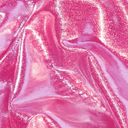


Enter the tags for the image above separated by commas: 

silk, fabric


KeyError: 'id_string'

In [18]:
blog = "sorting-colors"
folder = "Imgs_done"
csv_file = "tumblr_stats"

for i in df1.index:
    publisher(blog, folder, df1['sorted_names'][i], publication_dates[i], df1['sorted_RGBcolors'][i], csv_file, client)